# Install HandRefiner

In [ ]:
HOME = '/home/studio-lab-user/sagemaker-studiolab-notebooks'
%cd $HOME

!git clone https://github.com/wenquanlu/HandRefiner/
%cd HandRefiner
!git clone --recursive https://github.com/microsoft/MeshGraphormer.git
%cd MeshGraphormer
!pip install ./manopth/.
!mkdir -p models
!cp ../scripts/download_models.sh scripts/download_models.sh
!cp ../scripts/_gcnn.py src/modeling/_gcnn.py
!cp ../scripts/_mano.py src/modeling/_mano.py
!cp ../scripts/config.py src/modeling/data/config.py
!bash scripts/download_models.sh

import fileinput
import os
from os import path

%cd $HOME/HandRefiner/MeshGraphormer/src/modeling/data
if not path.exists(f'{HOME}/HandRefiner/MeshGraphormer/src/modeling/data/MANO_RIGHT.pkl'):
    get_ipython().system('wget -O MANO_RIGHT.pkl https://github.com/huchenlei/HandRefinerPortable/raw/master/mesh_graphormer/modeling/data/MANO_RIGHT.pkl')
    
%cd $HOME/HandRefiner
%cd preprocessor
if not path.exists(f'{HOME}/HandRefiner/preprocessor/hand_landmarker.task'):
    get_ipython().system('wget https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task')
    
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)
    
config_file = find('config.py', f'{HOME}/HandRefiner')
print('modifying file ' + str(config_file))
for line in fileinput.input(config_file, inplace=True):
    if ('handrefiner_root=""' in line):
        line = line.replace('handrefiner_root=""', f'handrefiner_root="{HOME}/HandRefiner"')
    print(line, end='')
    
!mkdir $HOME/HandRefiner/models
    
%cd $HOME/HandRefiner
!pip install -r requirements.txt
!pip install pytorch-lightning==1.8.3.post0
!pip uninstall torchmetrics -y
!pip install torchmetrics==0.7.0
!pip install embreex

%cd $HOME/HandRefiner/MeshGraphormer/src/modeling/bert
!cp ../../../transformers/pytorch_transformers/file_utils.py .
!cp ../../../transformers/pytorch_transformers/modeling_bert.py .
!cp ../../../transformers/pytorch_transformers/modeling_utils.py .

!mkdir $HOME/HandRefiner/input
!mkdir $HOME/HandRefiner/output

!conda install -y conda-forge::libglib

import datetime, random, os
from IPython.display import display, Image as DisplayImage
from PIL import Image
from os import path

def scale_image(input_path):
    # Open the image
    original_image = Image.open(input_path)

    # Check if the image size is already 512x512
    if original_image.size == (512, 512):
        print("Image is already 512x512 pixels. No scaling needed.")
        return input_path

    # Resize the image to 512x512
    scaled_image = original_image.resize((512, 512))

    # Create the output path for the scaled image
    output_path = os.path.join(os.path.dirname(input_path), f"s_{os.path.basename(input_path)}")

    # Save the scaled image
    scaled_image.save(output_path)

    print(f"Image scaled to 512x512 and saved to: {output_path}")
    return output_path


# Download the inpaint depth control model
If the model did not get downloaded to the HandRefiner/models folder after this step, upload it manually using the file manager. The model can be found here: https://drive.google.com/file/d/1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo/view?usp=sharing

In [ ]:
%cd $HOME/HandRefiner/models
!pip install gdown
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('gdown "https://drive.google.com/u/1/uc?id=1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo&confirm=t"')
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('wget "https://j2q5.c17.e2-1.dev/download/pogscafe/inpaint_depth_control.ckpt"')

# Run HandRefiner
Select the path to the images that need fixing and provide a helpful prompt.

/home/studio-lab-user/sagemaker-studiolab-notebooks/HandRefiner
Image is already 512x512 pixels. No scaling needed.
python handrefiner.py    --prompt_file prompts.json    --input_dir "/home/studio-lab-user/sagemaker-studiolab-notebooks/HandRefiner/"    --seed 2406510720    --out_dir "/home/studio-lab-user/sagemaker-studiolab-notebooks/HandRefiner/output/out_20240106-030738"    --strength 0.6    --weights "models/inpaint_depth_control.ckpt"    
No module 'xformers'. Proceeding without it.
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v1.10.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of

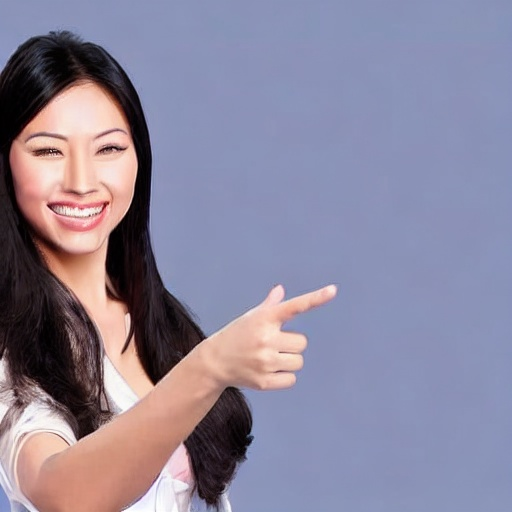

In [7]:
# Please enter tha path and prompt for at least one image.
# The path should be relative to the parent directory: $HOME/HandRefiner/

input_image_1 = "test/2.jpg" #@param {type:"string"}
prompt_1 = "a woman facing the camera, making a hand gesture, indoor" #@param {type:"string"}

input_image_2 = "" #@param {type:"string"}
prompt_2 = "" #@param {type:"string"}

input_image_3 = "" #@param {type:"string"}
prompt_3 = "" #@param {type:"string"}

input_image_4 = "" #@param {type:"string"}
prompt_4 = "" #@param {type:"string"}

input_image_5 = "" #@param {type:"string"}
prompt_5 = "" #@param {type:"string"}

strength = 0.6

# If the seed is a negative number, it will be randomly generated.
seed = -1 

# If output_folder is empty, the base output folder will be set to /content/HandRefiner/output and the subfolder name will be randomly generated.
output_folder = "" 

# Change the model_path value if you downloaded the model to a different location
model_path = "models/inpaint_depth_control.ckpt" 

if seed < 0:
  seed = random.randint(0, 4294967295)

%cd $HOME/HandRefiner

# Create the json file with input images and prompts
with open('prompts.json', 'w') as file:
    lines = []
    if not input_image_1 == "":
        input_image_1 = scale_image(input_image_1)
        lines.append(f'{{"img": "{input_image_1}", "txt": "{prompt_1}"}}\n')
    if not input_image_2 == "":
        input_image_2 = scale_image(input_image_2)
        lines.append(f'{{"img": "{input_image_2}", "txt": "{prompt_2}"}}\n')
    if not input_image_3 == "":
        input_image_3 = scale_image(input_image_3)
        lines.append(f'{{"img": "{input_image_3}", "txt": "{prompt_3}"}}\n')
    if not input_image_4 == "":
        input_image_4 = scale_image(input_image_4)
        lines.append(f'{{"img": "{input_image_4}", "txt": "{prompt_4}"}}\n')
    if not input_image_5 == "":
        input_image_5 = scale_image(input_image_5)
        lines.append(f'{{"img": "{input_image_5}", "txt": "{prompt_5}"}}\n')
    file.writelines(lines)

# Create the output folder
if output_folder == '':
    output_folder = f'out_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'
    output_path = f'{HOME}/HandRefiner/output/{output_folder}'
else:
    output_path = output_folder
!mkdir $output_path

# Generate the handrefiner command
cmd = f'''python handrefiner.py \
   --prompt_file prompts.json \
   --input_dir "{HOME}/HandRefiner/" \
   --seed {seed} \
   --out_dir "{output_path}" \
   --strength {strength} \
   --weights "{model_path}" \
   '''
print(cmd)

# Execute the command
get_ipython().system(cmd);

# Show all images in the output folder
%cd $output_path
for i in os.listdir(output_path):
    if (i.endswith(".jpg")):
        display(DisplayImage(filename=i, retina=True))